## εのバランスを崩す

εのバランスを崩して，今回構築したメカニズムが機能していることを確認する．\
ノイズの種類として，中度のプライバシーレベル(位置のノイズ換算で 1.2 )を利用して確認する．\
この際の効用関数の比は2:1のものを使用している．
### 中度のプライバシーレベル
正しいノイズとして，（ε_xy = 0.6, ε_t = 2.4）を用意し，位置にかけるノイズを徐々に強くしていく．

#### プロパティ

In [1]:
# モジュールの導入
import numpy as np
from scipy.special import lambertw as LW
import matplotlib.pyplot as plt
import statistics

In [2]:
# ユークリッド距離を返す関数
def distance(Noise_x, Noise_y, POI_x, POI_y):
    return np.sqrt( (Noise_x - POI_x)**2 + (Noise_y - POI_y)**2 )

In [3]:
# POI検索関数
def PointOfInterest(total_true, total_false, total_num, loc_info, POI_info,
                   x_noise, y_noise, t_noise, moving_speed):
    for times in range(total_num):
        t_sum = loc_info[2] + t_noise[times] + (distance(x_noise[0][times], y_noise[0][times],
                                                        POI_info[0], POI_info[1]) 
                                                / moving_speed)
        if (POI_info[2] > t_sum):
            total_true += 1
        else:
            total_false += 1
    return total_true, total_false

In [4]:
# 入力データ
# 実際の位置情報データ（時空間(x,y,t)）
real_loc_info = [0, 0, 12]

# POIデータ(時空間(x,y,t=閉館時刻))
POI_loc_info = [[0, 0,17],[4, 0,17],[8, 0,17],
                [12,0,17],[16,0,17],[20,0,17],
                [24,0,17],[28,0,17],[32,0,17],[36,0,17]]

# 移動速度
verocity = 4.0

# ランダム化した点の総数
total_num_points = 10000

# EXメカニズムの効用関数の比 pp : 1
pp = 2

In [5]:
# グラフ描画の際の横軸を用意する
time_list = []
for i in range(len(POI_loc_info)):
    time_list.append(distance(real_loc_info[0], real_loc_info[1], 
                              POI_loc_info[i][0], POI_loc_info[i][1]) 
                     / verocity)

#### 正しいノイズ（ε_xy = 0.6, ε_t = 2.4）

In [6]:
# POI検索プログラムによる出力（到達できるか否かを表す）
poi_true_total_0  = 0
poi_false_total_0 = 0
make_graph0       = []

# ノイズを付与した座標を格納するためのリスト
zx_list_0 = []
zy_list_0 = []
# ノイズを付与した時刻を格納するためのリスト
zt_list_0 = []

# POIの検索結果を格納するためのリスト
POI_result_list_0 = []
POI_True_list_0   = []
POI_False_list_0  = []

# epsilonの値の定義
epsilon_z_0 = 0.6
epsilon_t_0 = epsilon_z_0 * verocity

# ノイズを生成する
# thetaを[0:2π)の範囲で一様分布にしたがって生成する
theta = np.random.uniform(0,2*np.pi, total_num_points)

# [0:1)の範囲で一様分布に従ったランダぷのいずを生成する
p_z_0 = np.random.uniform(0,1,total_num_points)
p_t_0 = np.random.uniform(0,1,total_num_points)

for l in range(len(POI_loc_info)):
    for i in range(100):
        # 100回繰り返した平均を取得する
        # PLノイズを付与
        W = LW( ((p_z_0 - 1) / np.e), k = -1 )
        r = ( -1 / epsilon_z_0 ) * ( W + 1 )
        
        zx = real_loc_info[0] + r * np.cos(theta)
        zx_list_0.append(np.array(zx))
        zy = real_loc_info[1] + r * np.sin(theta)
        zy_list_0.append(np.array(zy))
        
        # EXノイズを付与
        for j in range(total_num_points):
            if p_t_0[j] <= (1/(pp+1)):
                zt_list_0.append( (2/epsilon_t_0) * np.log( ((pp+1)*p_t_0[j])))
            else:
                zt_list_0.append( ((2*pp)/epsilon_t_0) * np.log( (pp / ((pp+1)*(1-p_t_0[j]))) ))
        POI_result_list_0.append(PointOfInterest(
            poi_true_total_0, poi_false_total_0, total_num_points,
        real_loc_info, POI_loc_info[l], zx_list_0, zy_list_0, zt_list_0,
        verocity))
        
        # ノイズを付与した値を格納するためのリストをクリアする
        zx_list_0 = []
        zy_list_0 = []
        zt_list_0 = []
        
    for k in range(100):
        POI_True_list_0.append(POI_result_list_0[k][0])
        POI_False_list_0.append(POI_result_list_0[k][1])
        
    true_mean = statistics.mean(POI_True_list_0)
    false_mean = statistics.mean(POI_False_list_0)
    make_graph0.append(true_mean)

    # POIに関連するリストのクリア
    POI_result_list_0 = []
    POI_True_list_0   = []
    POI_False_list_0  = []
    poi_true_0 = 0
    poi_false_0 = 0
    print("Number "+str(l+1)+" is Done")
print("Finish")

Number 1 is Done
Number 2 is Done
Number 3 is Done
Number 4 is Done
Number 5 is Done
Number 6 is Done
Number 7 is Done
Number 8 is Done
Number 9 is Done
Number 10 is Done
Finish


#### 様々なノイズをかけたデータを作成する

##### ① ε_xy=0.55, ε_t=2.60

In [7]:
# POI検索プログラムによる出力（到達できるか否かを表す）
poi_true_total  = 0   
poi_false_total = 0   
make_graph1       = []  # Num change

# ノイズを付与した座標を格納するためのリスト
zx_list = []
zy_list = []
# ノイズを付与した時刻を格納するためのリスト
zt_list = []

# POIの検索結果を格納するためのリスト
POI_result_list = []
POI_True_list   = []
POI_False_list  = []

# epsilonの値の定義
epsilon_z_1 = 0.55       # Num change
epsilon_t_1 = 2.6        # Num change

# ノイズを生成する
# thetaを[0:2π)の範囲で一様分布にしたがって生成する
theta = np.random.uniform(0,2*np.pi, total_num_points)

# [0:1)の範囲で一様分布に従ったランダぷのいずを生成する
p_z = np.random.uniform(0,1,total_num_points)
p_t = np.random.uniform(0,1,total_num_points)

for l in range(len(POI_loc_info)):
    for i in range(100):
        # 100回繰り返した平均を取得する
        # PLノイズを付与
        W = LW( ((p_z - 1) / np.e), k = -1 )
        r = ( -1 / epsilon_z_1 ) * ( W + 1 )         # Num change
        
        zx = real_loc_info[0] + r * np.cos(theta)
        zx_list.append(np.array(zx))
        zy = real_loc_info[1] + r * np.sin(theta)
        zy_list.append(np.array(zy))
        
        # EXノイズを付与
        for j in range(total_num_points):
            if p_t[j] <= (1/(pp+1)):
                zt_list.append( (2/epsilon_t_1) * np.log( ((pp+1)*p_t[j])))                    # Num change
            else:
                zt_list.append( ((2*pp)/epsilon_t_1) * np.log( (pp / ((pp+1)*(1-p_t[j]))) ))   # Num change
        POI_result_list.append(PointOfInterest(
            poi_true_total, poi_false_total, total_num_points,
        real_loc_info, POI_loc_info[l], zx_list, zy_list, zt_list,
        verocity))
        
        # ノイズを付与した値を格納するためのリストをクリアする
        zx_list = []
        zy_list = []
        zt_list = []
        
    for k in range(100):
        POI_True_list.append(POI_result_list[k][0])
        POI_False_list.append(POI_result_list[k][1])
        
    true_mean = statistics.mean(POI_True_list) 
    #false_mean = statistics.mean(POI_False_list)
    make_graph1.append(true_mean)                    # Num change

    # POIに関連するリストのクリア
    POI_result_list = []
    POI_True_list   = []
    POI_False_list  = []
    poi_true        = 0
    poi_false       = 0
print("Finish")

Finish


##### ② ε_xy=0.50, ε_t=2.80

In [8]:
# POI検索プログラムによる出力（到達できるか否かを表す）
poi_true_total  = 0   
poi_false_total = 0   
make_graph2     = []  # Num change

# ノイズを付与した座標を格納するためのリスト
zx_list = []
zy_list = []
# ノイズを付与した時刻を格納するためのリスト
zt_list = []

# POIの検索結果を格納するためのリスト
POI_result_list = []
POI_True_list   = []
POI_False_list  = []

# epsilonの値の定義
epsilon_z_2 = 0.50       # Num change
epsilon_t_2 = 2.8       # Num change

# ノイズを生成する
# thetaを[0:2π)の範囲で一様分布にしたがって生成する
theta = np.random.uniform(0,2*np.pi, total_num_points)

# [0:1)の範囲で一様分布に従ったランダぷのいずを生成する
p_z = np.random.uniform(0,1,total_num_points)
p_t = np.random.uniform(0,1,total_num_points)

for l in range(len(POI_loc_info)):
    for i in range(100):
        # 100回繰り返した平均を取得する
        # PLノイズを付与
        W = LW( ((p_z - 1) / np.e), k = -1 )
        r = ( -1 / epsilon_z_2 ) * ( W + 1 )         # Num change
        
        zx = real_loc_info[0] + r * np.cos(theta)
        zx_list.append(np.array(zx))
        zy = real_loc_info[1] + r * np.sin(theta)
        zy_list.append(np.array(zy))
        
        # EXノイズを付与
        for j in range(total_num_points):
            if p_t[j] <= (1/(pp+1)):
                zt_list.append( (2/epsilon_t_2) * np.log( ((pp+1)*p_t[j])))                    # Num change
            else:
                zt_list.append( ((2*pp)/epsilon_t_2) * np.log( (pp / ((pp+1)*(1-p_t[j]))) ))   # Num change
        POI_result_list.append(PointOfInterest(
            poi_true_total, poi_false_total, total_num_points,
        real_loc_info, POI_loc_info[l], zx_list, zy_list, zt_list,
        verocity))
        
        # ノイズを付与した値を格納するためのリストをクリアする
        zx_list = []
        zy_list = []
        zt_list = []
        
    for k in range(100):
        POI_True_list.append(POI_result_list[k][0])
        POI_False_list.append(POI_result_list[k][1])
        
    true_mean = statistics.mean(POI_True_list) 
    #false_mean = statistics.mean(POI_False_list)
    make_graph2.append(true_mean)                    # Num change

    # POIに関連するリストのクリア
    POI_result_list = []
    POI_True_list   = []
    POI_False_list  = []
    poi_true        = 0
    poi_false       = 0
print("Finish")

Finish


##### ③ ε_xy=0.45, ε_t=3.00

In [9]:
# POI検索プログラムによる出力（到達できるか否かを表す）
poi_true_total  = 0   
poi_false_total = 0   
make_graph3     = []  # Num change

# ノイズを付与した座標を格納するためのリスト
zx_list = []
zy_list = []
# ノイズを付与した時刻を格納するためのリスト
zt_list = []

# POIの検索結果を格納するためのリスト
POI_result_list = []
POI_True_list   = []
POI_False_list  = []

# epsilonの値の定義
epsilon_z_3 = 0.45       # Num change
epsilon_t_3 = 3.00       # Num change

# ノイズを生成する
# thetaを[0:2π)の範囲で一様分布にしたがって生成する
theta = np.random.uniform(0,2*np.pi, total_num_points)

# [0:1)の範囲で一様分布に従ったランダぷのいずを生成する
p_z = np.random.uniform(0,1,total_num_points)
p_t = np.random.uniform(0,1,total_num_points)

for l in range(len(POI_loc_info)):
    for i in range(100):
        # 100回繰り返した平均を取得する
        # PLノイズを付与
        W = LW( ((p_z - 1) / np.e), k = -1 )
        r = ( -1 / epsilon_z_3 ) * ( W + 1 )         # Num change
        
        zx = real_loc_info[0] + r * np.cos(theta)
        zx_list.append(np.array(zx))
        zy = real_loc_info[1] + r * np.sin(theta)
        zy_list.append(np.array(zy))
        
        # EXノイズを付与
        for j in range(total_num_points):
            if p_t[j] <= (1/(pp+1)):
                zt_list.append( (2/epsilon_t_3) * np.log( ((pp+1)*p_t[j])))                    # Num change
            else:
                zt_list.append( ((2*pp)/epsilon_t_3) * np.log( (pp / ((pp+1)*(1-p_t[j]))) ))   # Num change
        POI_result_list.append(PointOfInterest(
            poi_true_total, poi_false_total, total_num_points,
        real_loc_info, POI_loc_info[l], zx_list, zy_list, zt_list,
        verocity))
        
        # ノイズを付与した値を格納するためのリストをクリアする
        zx_list = []
        zy_list = []
        zt_list = []
        
    for k in range(100):
        POI_True_list.append(POI_result_list[k][0])
        POI_False_list.append(POI_result_list[k][1])
        
    true_mean = statistics.mean(POI_True_list) 
    #false_mean = statistics.mean(POI_False_list)
    make_graph3.append(true_mean)                    # Num change

    # POIに関連するリストのクリア
    POI_result_list = []
    POI_True_list   = []
    POI_False_list  = []
    poi_true        = 0
    poi_false       = 0
print("Finish")

Finish


##### ④ ε_xy=0.40, ε_t=3.20

In [10]:
# POI検索プログラムによる出力（到達できるか否かを表す）
poi_true_total  = 0   
poi_false_total = 0   
make_graph4     = []  # Num change

# ノイズを付与した座標を格納するためのリスト
zx_list = []
zy_list = []
# ノイズを付与した時刻を格納するためのリスト
zt_list = []

# POIの検索結果を格納するためのリスト
POI_result_list = []
POI_True_list   = []
POI_False_list  = []

# epsilonの値の定義
epsilon_z_4 = 0.40       # Num change
epsilon_t_4 = 3.20       # Num change

# ノイズを生成する
# thetaを[0:2π)の範囲で一様分布にしたがって生成する
theta = np.random.uniform(0,2*np.pi, total_num_points)

# [0:1)の範囲で一様分布に従ったランダぷのいずを生成する
p_z = np.random.uniform(0,1,total_num_points)
p_t = np.random.uniform(0,1,total_num_points)

for l in range(len(POI_loc_info)):
    for i in range(100):
        # 100回繰り返した平均を取得する
        # PLノイズを付与
        W = LW( ((p_z - 1) / np.e), k = -1 )
        r = ( -1 / epsilon_z_4 ) * ( W + 1 )         # Num change
        
        zx = real_loc_info[0] + r * np.cos(theta)
        zx_list.append(np.array(zx))
        zy = real_loc_info[1] + r * np.sin(theta)
        zy_list.append(np.array(zy))
        
        # EXノイズを付与
        for j in range(total_num_points):
            if p_t[j] <= (1/(pp+1)):
                zt_list.append( (2/epsilon_t_4) * np.log( ((pp+1)*p_t[j])))                    # Num change
            else:
                zt_list.append( ((2*pp)/epsilon_t_4) * np.log( (pp / ((pp+1)*(1-p_t[j]))) ))   # Num change
        POI_result_list.append(PointOfInterest(
            poi_true_total, poi_false_total, total_num_points,
        real_loc_info, POI_loc_info[l], zx_list, zy_list, zt_list,
        verocity))
        
        # ノイズを付与した値を格納するためのリストをクリアする
        zx_list = []
        zy_list = []
        zt_list = []
        
    for k in range(100):
        POI_True_list.append(POI_result_list[k][0])
        POI_False_list.append(POI_result_list[k][1])
        
    true_mean = statistics.mean(POI_True_list) 
    #false_mean = statistics.mean(POI_False_list)
    make_graph4.append(true_mean)                    # Num change

    # POIに関連するリストのクリア
    POI_result_list = []
    POI_True_list   = []
    POI_False_list  = []
    poi_true        = 0
    poi_false       = 0
print("Finish")

Finish


##### ⑤ ε_xy=0.35, ε_t=3.40

In [11]:
# POI検索プログラムによる出力（到達できるか否かを表す）
poi_true_total  = 0   
poi_false_total = 0   
make_graph5     = []  # Num change

# ノイズを付与した座標を格納するためのリスト
zx_list = []
zy_list = []
# ノイズを付与した時刻を格納するためのリスト
zt_list = []

# POIの検索結果を格納するためのリスト
POI_result_list = []
POI_True_list   = []
POI_False_list  = []

# epsilonの値の定義
epsilon_z_5 = 0.35       # Num change
epsilon_t_5 = 3.40       # Num change

# ノイズを生成する
# thetaを[0:2π)の範囲で一様分布にしたがって生成する
theta = np.random.uniform(0,2*np.pi, total_num_points)

# [0:1)の範囲で一様分布に従ったランダぷのいずを生成する
p_z = np.random.uniform(0,1,total_num_points)
p_t = np.random.uniform(0,1,total_num_points)

for l in range(len(POI_loc_info)):
    for i in range(100):
        # 100回繰り返した平均を取得する
        # PLノイズを付与
        W = LW( ((p_z - 1) / np.e), k = -1 )
        r = ( -1 / epsilon_z_5 ) * ( W + 1 )         # Num change
        
        zx = real_loc_info[0] + r * np.cos(theta)
        zx_list.append(np.array(zx))
        zy = real_loc_info[1] + r * np.sin(theta)
        zy_list.append(np.array(zy))
        
        # EXノイズを付与
        for j in range(total_num_points):
            if p_t[j] <= (1/(pp+1)):
                zt_list.append( (2/epsilon_t_5) * np.log( ((pp+1)*p_t[j])))                    # Num change
            else:
                zt_list.append( ((2*pp)/epsilon_t_5) * np.log( (pp / ((pp+1)*(1-p_t[j]))) ))   # Num change
        POI_result_list.append(PointOfInterest(
            poi_true_total, poi_false_total, total_num_points,
        real_loc_info, POI_loc_info[l], zx_list, zy_list, zt_list,
        verocity))
        
        # ノイズを付与した値を格納するためのリストをクリアする
        zx_list = []
        zy_list = []
        zt_list = []
        
    for k in range(100):
        POI_True_list.append(POI_result_list[k][0])
        POI_False_list.append(POI_result_list[k][1])
        
    true_mean = statistics.mean(POI_True_list) 
    #false_mean = statistics.mean(POI_False_list)
    make_graph5.append(true_mean)                    # Num change

    # POIに関連するリストのクリア
    POI_result_list = []
    POI_True_list   = []
    POI_False_list  = []
    poi_true        = 0
    poi_false       = 0
print("Finish")

Finish


##### ⑥ ε_xy=0.30, ε_t=3.60

In [12]:
# POI検索プログラムによる出力（到達できるか否かを表す）
poi_true_total  = 0   
poi_false_total = 0   
make_graph6     = []  # Num change

# ノイズを付与した座標を格納するためのリスト
zx_list = []
zy_list = []
# ノイズを付与した時刻を格納するためのリスト
zt_list = []

# POIの検索結果を格納するためのリスト
POI_result_list = []
POI_True_list   = []
POI_False_list  = []

# epsilonの値の定義
epsilon_z_6 = 0.30       # Num change
epsilon_t_6 = 3.60       # Num change

# ノイズを生成する
# thetaを[0:2π)の範囲で一様分布にしたがって生成する
theta = np.random.uniform(0,2*np.pi, total_num_points)

# [0:1)の範囲で一様分布に従ったランダぷのいずを生成する
p_z = np.random.uniform(0,1,total_num_points)
p_t = np.random.uniform(0,1,total_num_points)

for l in range(len(POI_loc_info)):
    for i in range(100):
        # 100回繰り返した平均を取得する
        # PLノイズを付与
        W = LW( ((p_z - 1) / np.e), k = -1 )
        r = ( -1 / epsilon_z_6 ) * ( W + 1 )         # Num change
        
        zx = real_loc_info[0] + r * np.cos(theta)
        zx_list.append(np.array(zx))
        zy = real_loc_info[1] + r * np.sin(theta)
        zy_list.append(np.array(zy))
        
        # EXノイズを付与
        for j in range(total_num_points):
            if p_t[j] <= (1/(pp+1)):
                zt_list.append( (2/epsilon_t_6) * np.log( ((pp+1)*p_t[j])))                    # Num change
            else:
                zt_list.append( ((2*pp)/epsilon_t_6) * np.log( (pp / ((pp+1)*(1-p_t[j]))) ))   # Num change
        POI_result_list.append(PointOfInterest(
            poi_true_total, poi_false_total, total_num_points,
        real_loc_info, POI_loc_info[l], zx_list, zy_list, zt_list,
        verocity))
        
        # ノイズを付与した値を格納するためのリストをクリアする
        zx_list = []
        zy_list = []
        zt_list = []
        
    for k in range(100):
        POI_True_list.append(POI_result_list[k][0])
        POI_False_list.append(POI_result_list[k][1])
        
    true_mean = statistics.mean(POI_True_list) 
    #false_mean = statistics.mean(POI_False_list)
    make_graph6.append(true_mean)                    # Num change

    # POIに関連するリストのクリア
    POI_result_list = []
    POI_True_list   = []
    POI_False_list  = []
    poi_true        = 0
    poi_false       = 0
print("Finish")

Finish


##### ⑦ ε_xy=0.25, ε_t=3.80

In [13]:
# POI検索プログラムによる出力（到達できるか否かを表す）
poi_true_total  = 0   
poi_false_total = 0   
make_graph7     = []  # Num change

# ノイズを付与した座標を格納するためのリスト
zx_list = []
zy_list = []
# ノイズを付与した時刻を格納するためのリスト
zt_list = []

# POIの検索結果を格納するためのリスト
POI_result_list = []
POI_True_list   = []
POI_False_list  = []

# epsilonの値の定義
epsilon_z_7 = 0.25       # Num change
epsilon_t_7 = 3.80      # Num change

# ノイズを生成する
# thetaを[0:2π)の範囲で一様分布にしたがって生成する
theta = np.random.uniform(0,2*np.pi, total_num_points)

# [0:1)の範囲で一様分布に従ったランダぷのいずを生成する
p_z = np.random.uniform(0,1,total_num_points)
p_t = np.random.uniform(0,1,total_num_points)

for l in range(len(POI_loc_info)):
    for i in range(100):
        # 100回繰り返した平均を取得する
        # PLノイズを付与
        W = LW( ((p_z - 1) / np.e), k = -1 )
        r = ( -1 / epsilon_z_7 ) * ( W + 1 )         # Num change
        
        zx = real_loc_info[0] + r * np.cos(theta)
        zx_list.append(np.array(zx))
        zy = real_loc_info[1] + r * np.sin(theta)
        zy_list.append(np.array(zy))
        
        # EXノイズを付与
        for j in range(total_num_points):
            if p_t[j] <= (1/(pp+1)):
                zt_list.append( (2/epsilon_t_7) * np.log( ((pp+1)*p_t[j])))                    # Num change
            else:
                zt_list.append( ((2*pp)/epsilon_t_7) * np.log( (pp / ((pp+1)*(1-p_t[j]))) ))   # Num change
        POI_result_list.append(PointOfInterest(
            poi_true_total, poi_false_total, total_num_points,
        real_loc_info, POI_loc_info[l], zx_list, zy_list, zt_list,
        verocity))
        
        # ノイズを付与した値を格納するためのリストをクリアする
        zx_list = []
        zy_list = []
        zt_list = []
        
    for k in range(100):
        POI_True_list.append(POI_result_list[k][0])
        POI_False_list.append(POI_result_list[k][1])
        
    true_mean = statistics.mean(POI_True_list) 
    #false_mean = statistics.mean(POI_False_list)
    make_graph7.append(true_mean)                    # Num change

    # POIに関連するリストのクリア
    POI_result_list = []
    POI_True_list   = []
    POI_False_list  = []
    poi_true        = 0
    poi_false       = 0
print("Finish")

Finish


##### ⑧ ε_xy=0.20, ε_t=4.00

In [14]:
# POI検索プログラムによる出力（到達できるか否かを表す）
poi_true_total  = 0   
poi_false_total = 0   
make_graph8     = []  # Num change

# ノイズを付与した座標を格納するためのリスト
zx_list = []
zy_list = []
# ノイズを付与した時刻を格納するためのリスト
zt_list = []

# POIの検索結果を格納するためのリスト
POI_result_list = []
POI_True_list   = []
POI_False_list  = []

# epsilonの値の定義
epsilon_z_8 = 0.20       # Num change
epsilon_t_8 = 4.00       # Num change

# ノイズを生成する
# thetaを[0:2π)の範囲で一様分布にしたがって生成する
theta = np.random.uniform(0,2*np.pi, total_num_points)

# [0:1)の範囲で一様分布に従ったランダぷのいずを生成する
p_z = np.random.uniform(0,1,total_num_points)
p_t = np.random.uniform(0,1,total_num_points)

for l in range(len(POI_loc_info)):
    for i in range(100):
        # 100回繰り返した平均を取得する
        # PLノイズを付与
        W = LW( ((p_z - 1) / np.e), k = -1 )
        r = ( -1 / epsilon_z_8 ) * ( W + 1 )         # Num change
        
        zx = real_loc_info[0] + r * np.cos(theta)
        zx_list.append(np.array(zx))
        zy = real_loc_info[1] + r * np.sin(theta)
        zy_list.append(np.array(zy))
        
        # EXノイズを付与
        for j in range(total_num_points):
            if p_t[j] <= (1/(pp+1)):
                zt_list.append( (2/epsilon_t_8) * np.log( ((pp+1)*p_t[j])))                    # Num change
            else:
                zt_list.append( ((2*pp)/epsilon_t_8) * np.log( (pp / ((pp+1)*(1-p_t[j]))) ))   # Num change
        POI_result_list.append(PointOfInterest(
            poi_true_total, poi_false_total, total_num_points,
        real_loc_info, POI_loc_info[l], zx_list, zy_list, zt_list,
        verocity))
        
        # ノイズを付与した値を格納するためのリストをクリアする
        zx_list = []
        zy_list = []
        zt_list = []
        
    for k in range(100):
        POI_True_list.append(POI_result_list[k][0])
        POI_False_list.append(POI_result_list[k][1])
        
    true_mean = statistics.mean(POI_True_list) 
    #false_mean = statistics.mean(POI_False_list)
    make_graph8.append(true_mean)                    # Num change

    # POIに関連するリストのクリア
    POI_result_list = []
    POI_True_list   = []
    POI_False_list  = []
    poi_true        = 0
    poi_false       = 0
print("Finish")

Finish


##### ⑨ ε_xy=0.15, ε_t=4.20

In [15]:
# POI検索プログラムによる出力（到達できるか否かを表す）
poi_true_total  = 0   
poi_false_total = 0   
make_graph9     = []  # Num change

# ノイズを付与した座標を格納するためのリスト
zx_list = []
zy_list = []
# ノイズを付与した時刻を格納するためのリスト
zt_list = []

# POIの検索結果を格納するためのリスト
POI_result_list = []
POI_True_list   = []
POI_False_list  = []

# epsilonの値の定義
epsilon_z_9 = 0.15       # Num change
epsilon_t_9 = 4.20       # Num change

# ノイズを生成する
# thetaを[0:2π)の範囲で一様分布にしたがって生成する
theta = np.random.uniform(0,2*np.pi, total_num_points)

# [0:1)の範囲で一様分布に従ったランダぷのいずを生成する
p_z = np.random.uniform(0,1,total_num_points)
p_t = np.random.uniform(0,1,total_num_points)

for l in range(len(POI_loc_info)):
    for i in range(100):
        # 100回繰り返した平均を取得する
        # PLノイズを付与
        W = LW( ((p_z - 1) / np.e), k = -1 )
        r = ( -1 / epsilon_z_9 ) * ( W + 1 )         # Num change
        
        zx = real_loc_info[0] + r * np.cos(theta)
        zx_list.append(np.array(zx))
        zy = real_loc_info[1] + r * np.sin(theta)
        zy_list.append(np.array(zy))
        
        # EXノイズを付与
        for j in range(total_num_points):
            if p_t[j] <= (1/(pp+1)):
                zt_list.append( (2/epsilon_t_9) * np.log( ((pp+1)*p_t[j])))                    # Num change
            else:
                zt_list.append( ((2*pp)/epsilon_t_9) * np.log( (pp / ((pp+1)*(1-p_t[j]))) ))   # Num change
        POI_result_list.append(PointOfInterest(
            poi_true_total, poi_false_total, total_num_points,
        real_loc_info, POI_loc_info[l], zx_list, zy_list, zt_list,
        verocity))
        
        # ノイズを付与した値を格納するためのリストをクリアする
        zx_list = []
        zy_list = []
        zt_list = []
        
    for k in range(100):
        POI_True_list.append(POI_result_list[k][0])
        POI_False_list.append(POI_result_list[k][1])
        
    true_mean = statistics.mean(POI_True_list) 
    #false_mean = statistics.mean(POI_False_list)
    make_graph9.append(true_mean)                    # Num change

    # POIに関連するリストのクリア
    POI_result_list = []
    POI_True_list   = []
    POI_False_list  = []
    poi_true        = 0
    poi_false       = 0
print("Finish")

Finish


##### ⑩ ε_xy=0.10, ε_t=4.40

In [16]:
# POI検索プログラムによる出力（到達できるか否かを表す）
poi_true_total  = 0   
poi_false_total = 0   
make_graph10     = []  # Num change

# ノイズを付与した座標を格納するためのリスト
zx_list = []
zy_list = []
# ノイズを付与した時刻を格納するためのリスト
zt_list = []

# POIの検索結果を格納するためのリスト
POI_result_list = []
POI_True_list   = []
POI_False_list  = []

# epsilonの値の定義
epsilon_z_10 = 0.10       # Num change
epsilon_t_10 = 4.40       # Num change

# ノイズを生成する
# thetaを[0:2π)の範囲で一様分布にしたがって生成する
theta = np.random.uniform(0,2*np.pi, total_num_points)

# [0:1)の範囲で一様分布に従ったランダぷのいずを生成する
p_z = np.random.uniform(0,1,total_num_points)
p_t = np.random.uniform(0,1,total_num_points)

for l in range(len(POI_loc_info)):
    for i in range(100):
        # 100回繰り返した平均を取得する
        # PLノイズを付与
        W = LW( ((p_z - 1) / np.e), k = -1 )
        r = ( -1 / epsilon_z_10 ) * ( W + 1 )         # Num change
        
        zx = real_loc_info[0] + r * np.cos(theta)
        zx_list.append(np.array(zx))
        zy = real_loc_info[1] + r * np.sin(theta)
        zy_list.append(np.array(zy))
        
        # EXノイズを付与
        for j in range(total_num_points):
            if p_t[j] <= (1/(pp+1)):
                zt_list.append( (2/epsilon_t_10) * np.log( ((pp+1)*p_t[j])))                    # Num change
            else:
                zt_list.append( ((2*pp)/epsilon_t_10) * np.log( (pp / ((pp+1)*(1-p_t[j]))) ))   # Num change
        POI_result_list.append(PointOfInterest(
            poi_true_total, poi_false_total, total_num_points,
        real_loc_info, POI_loc_info[l], zx_list, zy_list, zt_list,
        verocity))
        
        # ノイズを付与した値を格納するためのリストをクリアする
        zx_list = []
        zy_list = []
        zt_list = []
        
    for k in range(100):
        POI_True_list.append(POI_result_list[k][0])
        POI_False_list.append(POI_result_list[k][1])
        
    true_mean = statistics.mean(POI_True_list) 
    #false_mean = statistics.mean(POI_False_list)
    make_graph10.append(true_mean)                    # Num change

    # POIに関連するリストのクリア
    POI_result_list = []
    POI_True_list   = []
    POI_False_list  = []
    poi_true        = 0
    poi_false       = 0
print("Finish")

Finish


##### 11. ε_xy=0.05, ε_t=4.60

In [17]:
# POI検索プログラムによる出力（到達できるか否かを表す）
poi_true_total  = 0   
poi_false_total = 0   
make_graph11     = []  # Num change

# ノイズを付与した座標を格納するためのリスト
zx_list = []
zy_list = []
# ノイズを付与した時刻を格納するためのリスト
zt_list = []

# POIの検索結果を格納するためのリスト
POI_result_list = []
POI_True_list   = []
POI_False_list  = []

# epsilonの値の定義
epsilon_z_11 = 0.05       # Num change
epsilon_t_11 = 4.60       # Num change

# ノイズを生成する
# thetaを[0:2π)の範囲で一様分布にしたがって生成する
theta = np.random.uniform(0,2*np.pi, total_num_points)

# [0:1)の範囲で一様分布に従ったランダぷのいずを生成する
p_z = np.random.uniform(0,1,total_num_points)
p_t = np.random.uniform(0,1,total_num_points)

for l in range(len(POI_loc_info)):
    for i in range(100):
        # 100回繰り返した平均を取得する
        # PLノイズを付与
        W = LW( ((p_z - 1) / np.e), k = -1 )
        r = ( -1 / epsilon_z_11 ) * ( W + 1 )         # Num change
        
        zx = real_loc_info[0] + r * np.cos(theta)
        zx_list.append(np.array(zx))
        zy = real_loc_info[1] + r * np.sin(theta)
        zy_list.append(np.array(zy))
        
        # EXノイズを付与
        for j in range(total_num_points):
            if p_t[j] <= (1/(pp+1)):
                zt_list.append( (2/epsilon_t_11) * np.log( ((pp+1)*p_t[j])))                    # Num change
            else:
                zt_list.append( ((2*pp)/epsilon_t_11) * np.log( (pp / ((pp+1)*(1-p_t[j]))) ))   # Num change
        POI_result_list.append(PointOfInterest(
            poi_true_total, poi_false_total, total_num_points,
        real_loc_info, POI_loc_info[l], zx_list, zy_list, zt_list,
        verocity))
        
        # ノイズを付与した値を格納するためのリストをクリアする
        zx_list = []
        zy_list = []
        zt_list = []
        
    for k in range(100):
        POI_True_list.append(POI_result_list[k][0])
        POI_False_list.append(POI_result_list[k][1])
        
    true_mean = statistics.mean(POI_True_list) 
    #false_mean = statistics.mean(POI_False_list)
    make_graph11.append(true_mean)                    # Num change

    # POIに関連するリストのクリア
    POI_result_list = []
    POI_True_list   = []
    POI_False_list  = []
    poi_true        = 0
    poi_false       = 0
print("Finish")

Finish


### グラフを出力する

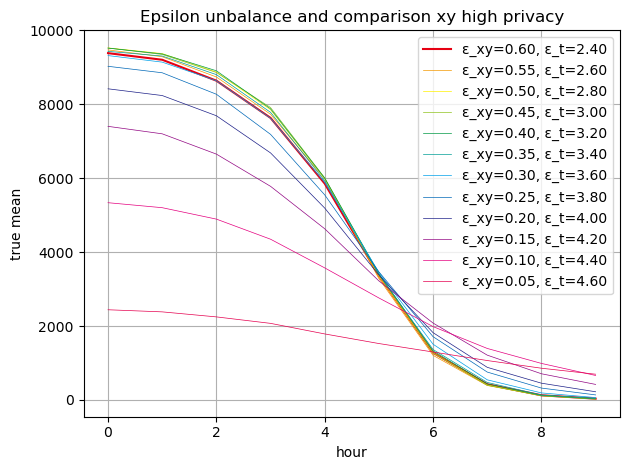

In [18]:
fig, ax = plt.subplots()

# 各プロットの色
c0,c1,c2,c3   = "#E60012","#F39800","#FFF100","#8FC31F"
c4,c5,c6,c7   = "#009944","#009E96","#00A0E9","#0068B7"
c8,c9,c10,c11 = "#1D2088","#920783","#E4007F","#E5004F"

# 各ラベル
l0,l1,l2,l3   = "ε_xy=0.60, ε_t=2.40","ε_xy=0.55, ε_t=2.60","ε_xy=0.50, ε_t=2.80","ε_xy=0.45, ε_t=3.00"
l4,l5,l6,l7   = "ε_xy=0.40, ε_t=3.20","ε_xy=0.35, ε_t=3.40","ε_xy=0.30, ε_t=3.60","ε_xy=0.25, ε_t=3.80"
l8,l9,l10,l11 = "ε_xy=0.20, ε_t=4.00","ε_xy=0.15, ε_t=4.20","ε_xy=0.10, ε_t=4.40","ε_xy=0.05, ε_t=4.60"

ax.set_xlabel('hour')  # x軸ラベル
ax.set_ylabel('true mean')  # y軸ラベル
ax.set_title(r'Epsilon unbalance and comparison xy high privacy') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
#ax.set_xlim([-10, 10]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(time_list, make_graph0, color=c0, label=l0)
ax.plot(time_list, make_graph1, color=c1, label=l1, lw=0.5)
ax.plot(time_list, make_graph2, color=c2, label=l2, lw=0.5)
ax.plot(time_list, make_graph3, color=c3, label=l3, lw=0.5)
ax.plot(time_list, make_graph4, color=c4, label=l4, lw=0.5)
ax.plot(time_list, make_graph5, color=c5, label=l5, lw=0.5)
ax.plot(time_list, make_graph6, color=c6, label=l6, lw=0.5)
ax.plot(time_list, make_graph7, color=c7, label=l7, lw=0.5)
ax.plot(time_list, make_graph8, color=c8, label=l8, lw=0.5)
ax.plot(time_list, make_graph9, color=c9, label=l9, lw=0.5)
ax.plot(time_list, make_graph10, color=c10, label=l10, lw=0.5)
ax.plot(time_list, make_graph11, color=c11, label=l11, lw=0.5)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
plt.savefig('EpsilonUnbalance-1.png') # 画像の保存
plt.show()